In [242]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Answer 1. Loading the datase

In [243]:
#Read the data as a dataframe
df=pd.read_csv('Parkinsons-Data.csv')

# Answer 2. Basic information about the data
#### In this section, we will focus on understanding the data as we perform Exploratory Data Analysis

In [244]:
df.head()
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [245]:
print('Number of Columns={}'.format(len(df.columns)))
print(df.columns)


Number of Columns=24
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


## Let's Understand the Attributes in the Dataset
##### name - ASCII subject name and recording number
##### MDVP:Fo(Hz) - Average vocal fundamental frequency
##### MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
##### MDVP: Flo(Hz) - Minimum vocal fundamental frequency
##### MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP-Several Measures of variation in fundamental frequency

##### Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA- Several measures of variation in amplitude

##### NHR,HNR- Two measures of ration of noise to tonal components in the voice 
##### status-Health status of the subject(one) -Parkinson's,(zero)-healthy
##### RDPE,D2-Two nonlinear dynamical complexity measures
##### DFA-Signal fractal scaling exponent
##### spread1,spread2,PPE-Three nonlinear measures of fundamental frequency
##### variation 0.car name: string(unique for each instance)

In [246]:
#Shape of Dataset
print('Shape of the dataset:{}'.format(df.shape))

Shape of the dataset:(195, 24)


In [247]:
#Data Types of each Attribute
print('Let\'s have a look at the data type of each attribute')
df.dtypes

Let's have a look at the data type of each attribute


name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

We can notice that 'name' column is of object type

In [248]:
#Checking the presence of missing values
print(df.isnull().values.any())
print('There are no missing values')

False
There are no missing values


In [249]:
#5 point summary. This is one of the most important part of EDA.
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


We can observe that we have a 5 point summary for 23 attributes, although there are 24 attributes. The only attribute that is not present here is 'name', because it is not a numerical attribute.

We can observe that the only attribute to have negative values here is 'spread1'.

## Answer.3. Let's have a look at how each attribute is distributed
We will remove 'name' column entirely since it is nominal data.

In [250]:
df.columns
df=df.drop(['name'],axis=1)

AxesSubplot(0.125,0.125;0.775x0.755)
We can observe that the data is right skewed


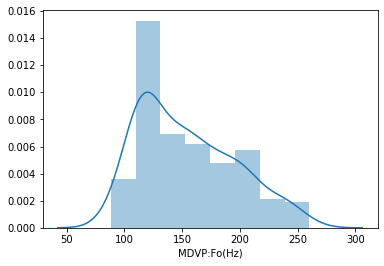

In [251]:
print(sns.distplot(df['MDVP:Fo(Hz)']))
print('We can observe that the data is right skewed')

We can observe that maximum data is distributed between values of 100-300


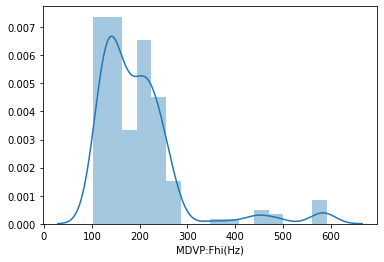

In [252]:
print('We can observe that maximum data is distributed between values of 100-300')
sns.distplot(df['MDVP:Fhi(Hz)'])

We can notice that this column contains outliers


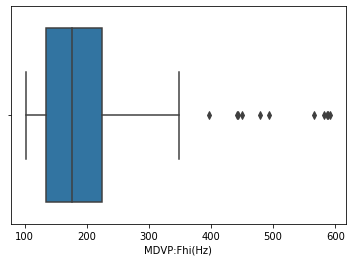

In [253]:
print('We can notice that this column contains outliers')
sns.boxplot(df['MDVP:Fhi(Hz)'])

We can observe that maximum data is distributed between 60-125 although after that, data is distributed evenly with some exceptions


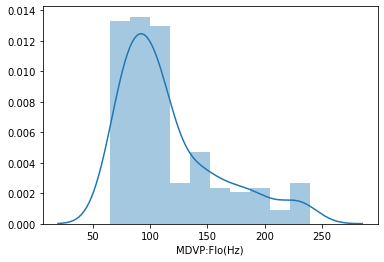

In [254]:
print('We can observe that maximum data is distributed between 60-125 although after that, data is distributed evenly with some exceptions')
sns.distplot(df['MDVP:Flo(Hz)'])


We can observe that this data too contains outliers


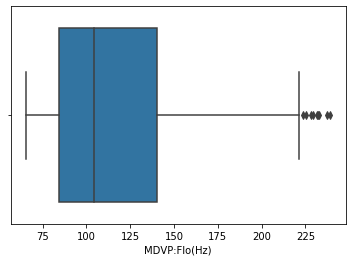

In [255]:
print('We can observe that this data too contains outliers')
sns.boxplot(df['MDVP:Flo(Hz)'])

We can observe here that maximum data is distributed between 0.002-0.011


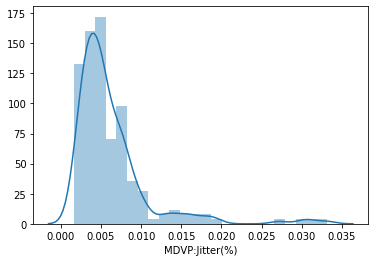

In [256]:
print('We can observe here that maximum data is distributed between 0.002-0.011')
sns.distplot(df['MDVP:Jitter(%)'])


We can observe that this column contains outliers and are varying a lot


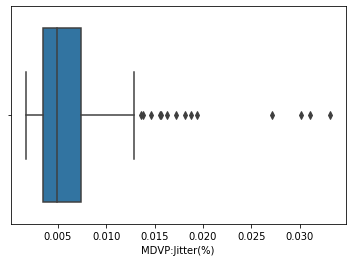

In [257]:
print('We can observe that this column contains outliers and are varying a lot')
sns.boxplot(df['MDVP:Jitter(%)'])

Maximum data is distributed between 0.00001 and 0.001 and this column contains a lot of outliers


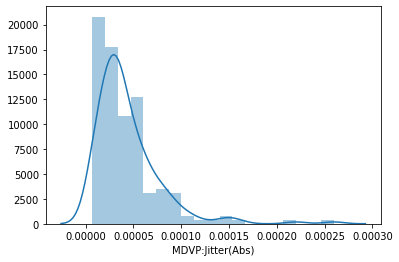

In [258]:
print('Maximum data is distributed between 0.00001 and 0.001 and this column contains a lot of outliers')
sns.distplot(df['MDVP:Jitter(Abs)'])

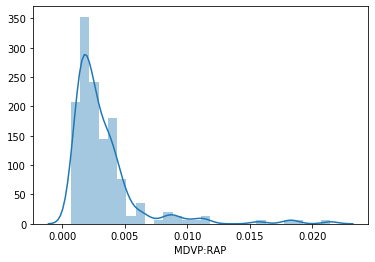

In [259]:
sns.distplot(df['MDVP:RAP'])

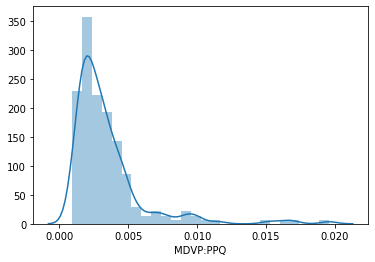

In [260]:
sns.distplot(df['MDVP:PPQ'])

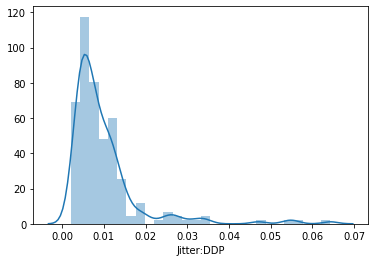

In [261]:
sns.distplot(df['Jitter:DDP'])

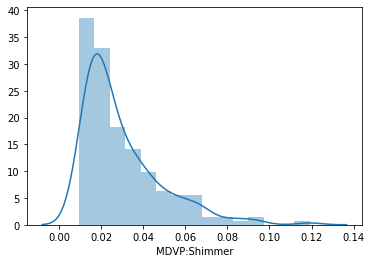

In [262]:
sns.distplot(df['MDVP:Shimmer'])

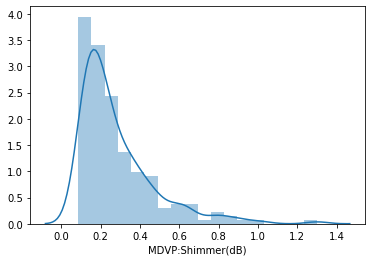

In [263]:
sns.distplot(df['MDVP:Shimmer(dB)'])

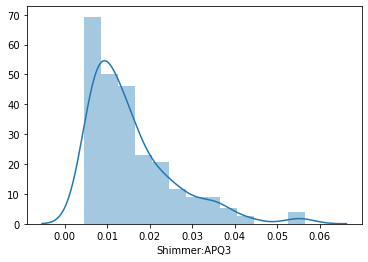

In [264]:
sns.distplot(df['Shimmer:APQ3'])

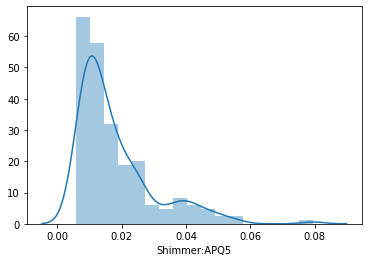

In [265]:
sns.distplot(df['Shimmer:APQ5'])

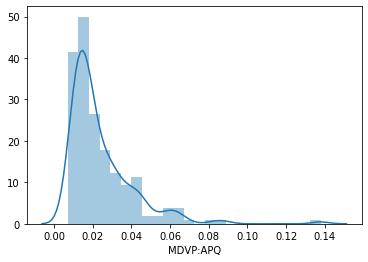

In [266]:
sns.distplot(df['MDVP:APQ'])

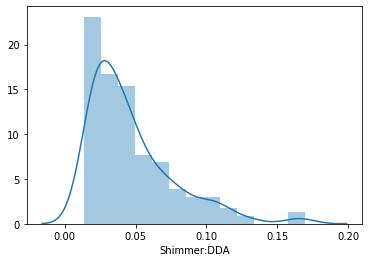

In [267]:
sns.distplot(df['Shimmer:DDA'])

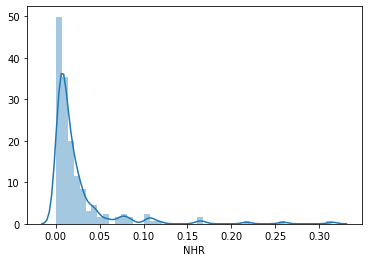

In [268]:
sns.distplot(df['NHR'])

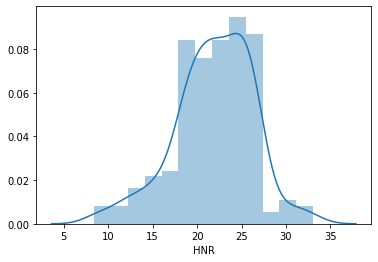

In [269]:
sns.distplot(df['HNR'])

0 means healthy and 1 means Parkinson's


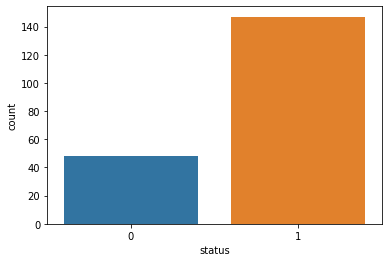

In [270]:
print('0 means healthy and 1 means Parkinson\'s')
sns.countplot(df['status'])

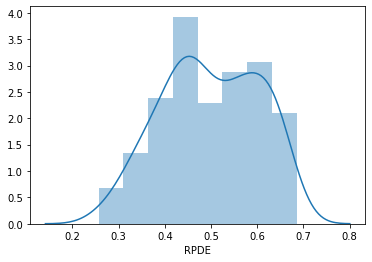

In [271]:
sns.distplot(df['RPDE'])

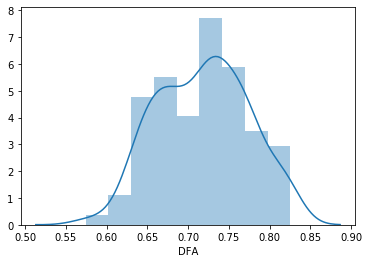

In [272]:
sns.distplot(df['DFA'])

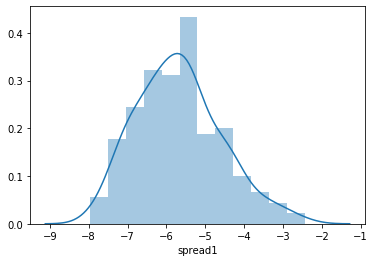

In [273]:
sns.distplot(df['spread1'])

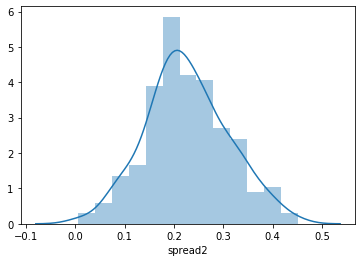

In [274]:
sns.distplot(df['spread2'])

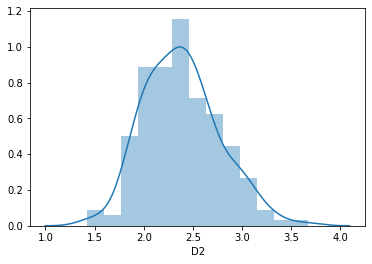

In [275]:
sns.distplot(df['D2'])

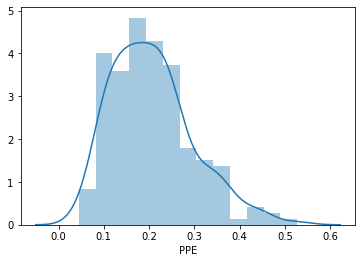

In [276]:
sns.distplot(df['PPE'])

We can observe that almost all the columns contain outliers, although the distribution is either normal or slightly skewed.

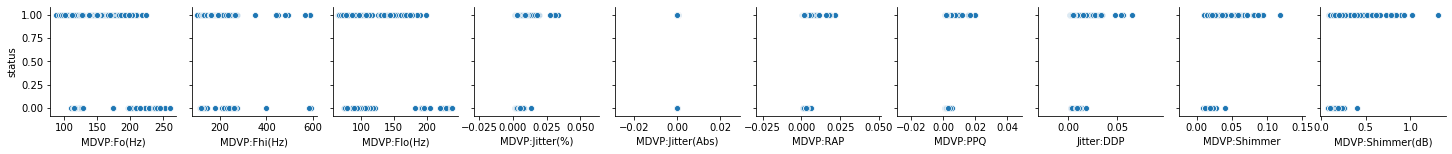

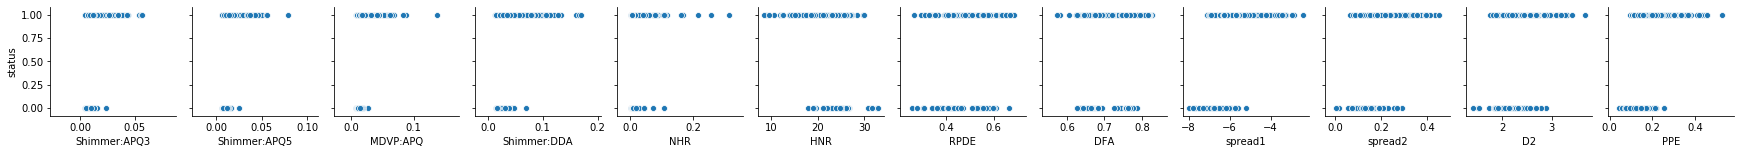

In [277]:

print(sns.pairplot(df,x_vars=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)'],y_vars=['status'],height=2,aspect=1))
print(sns.pairplot(df,x_vars=['Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR','RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],y_vars=['status'],height=2,aspect=1))

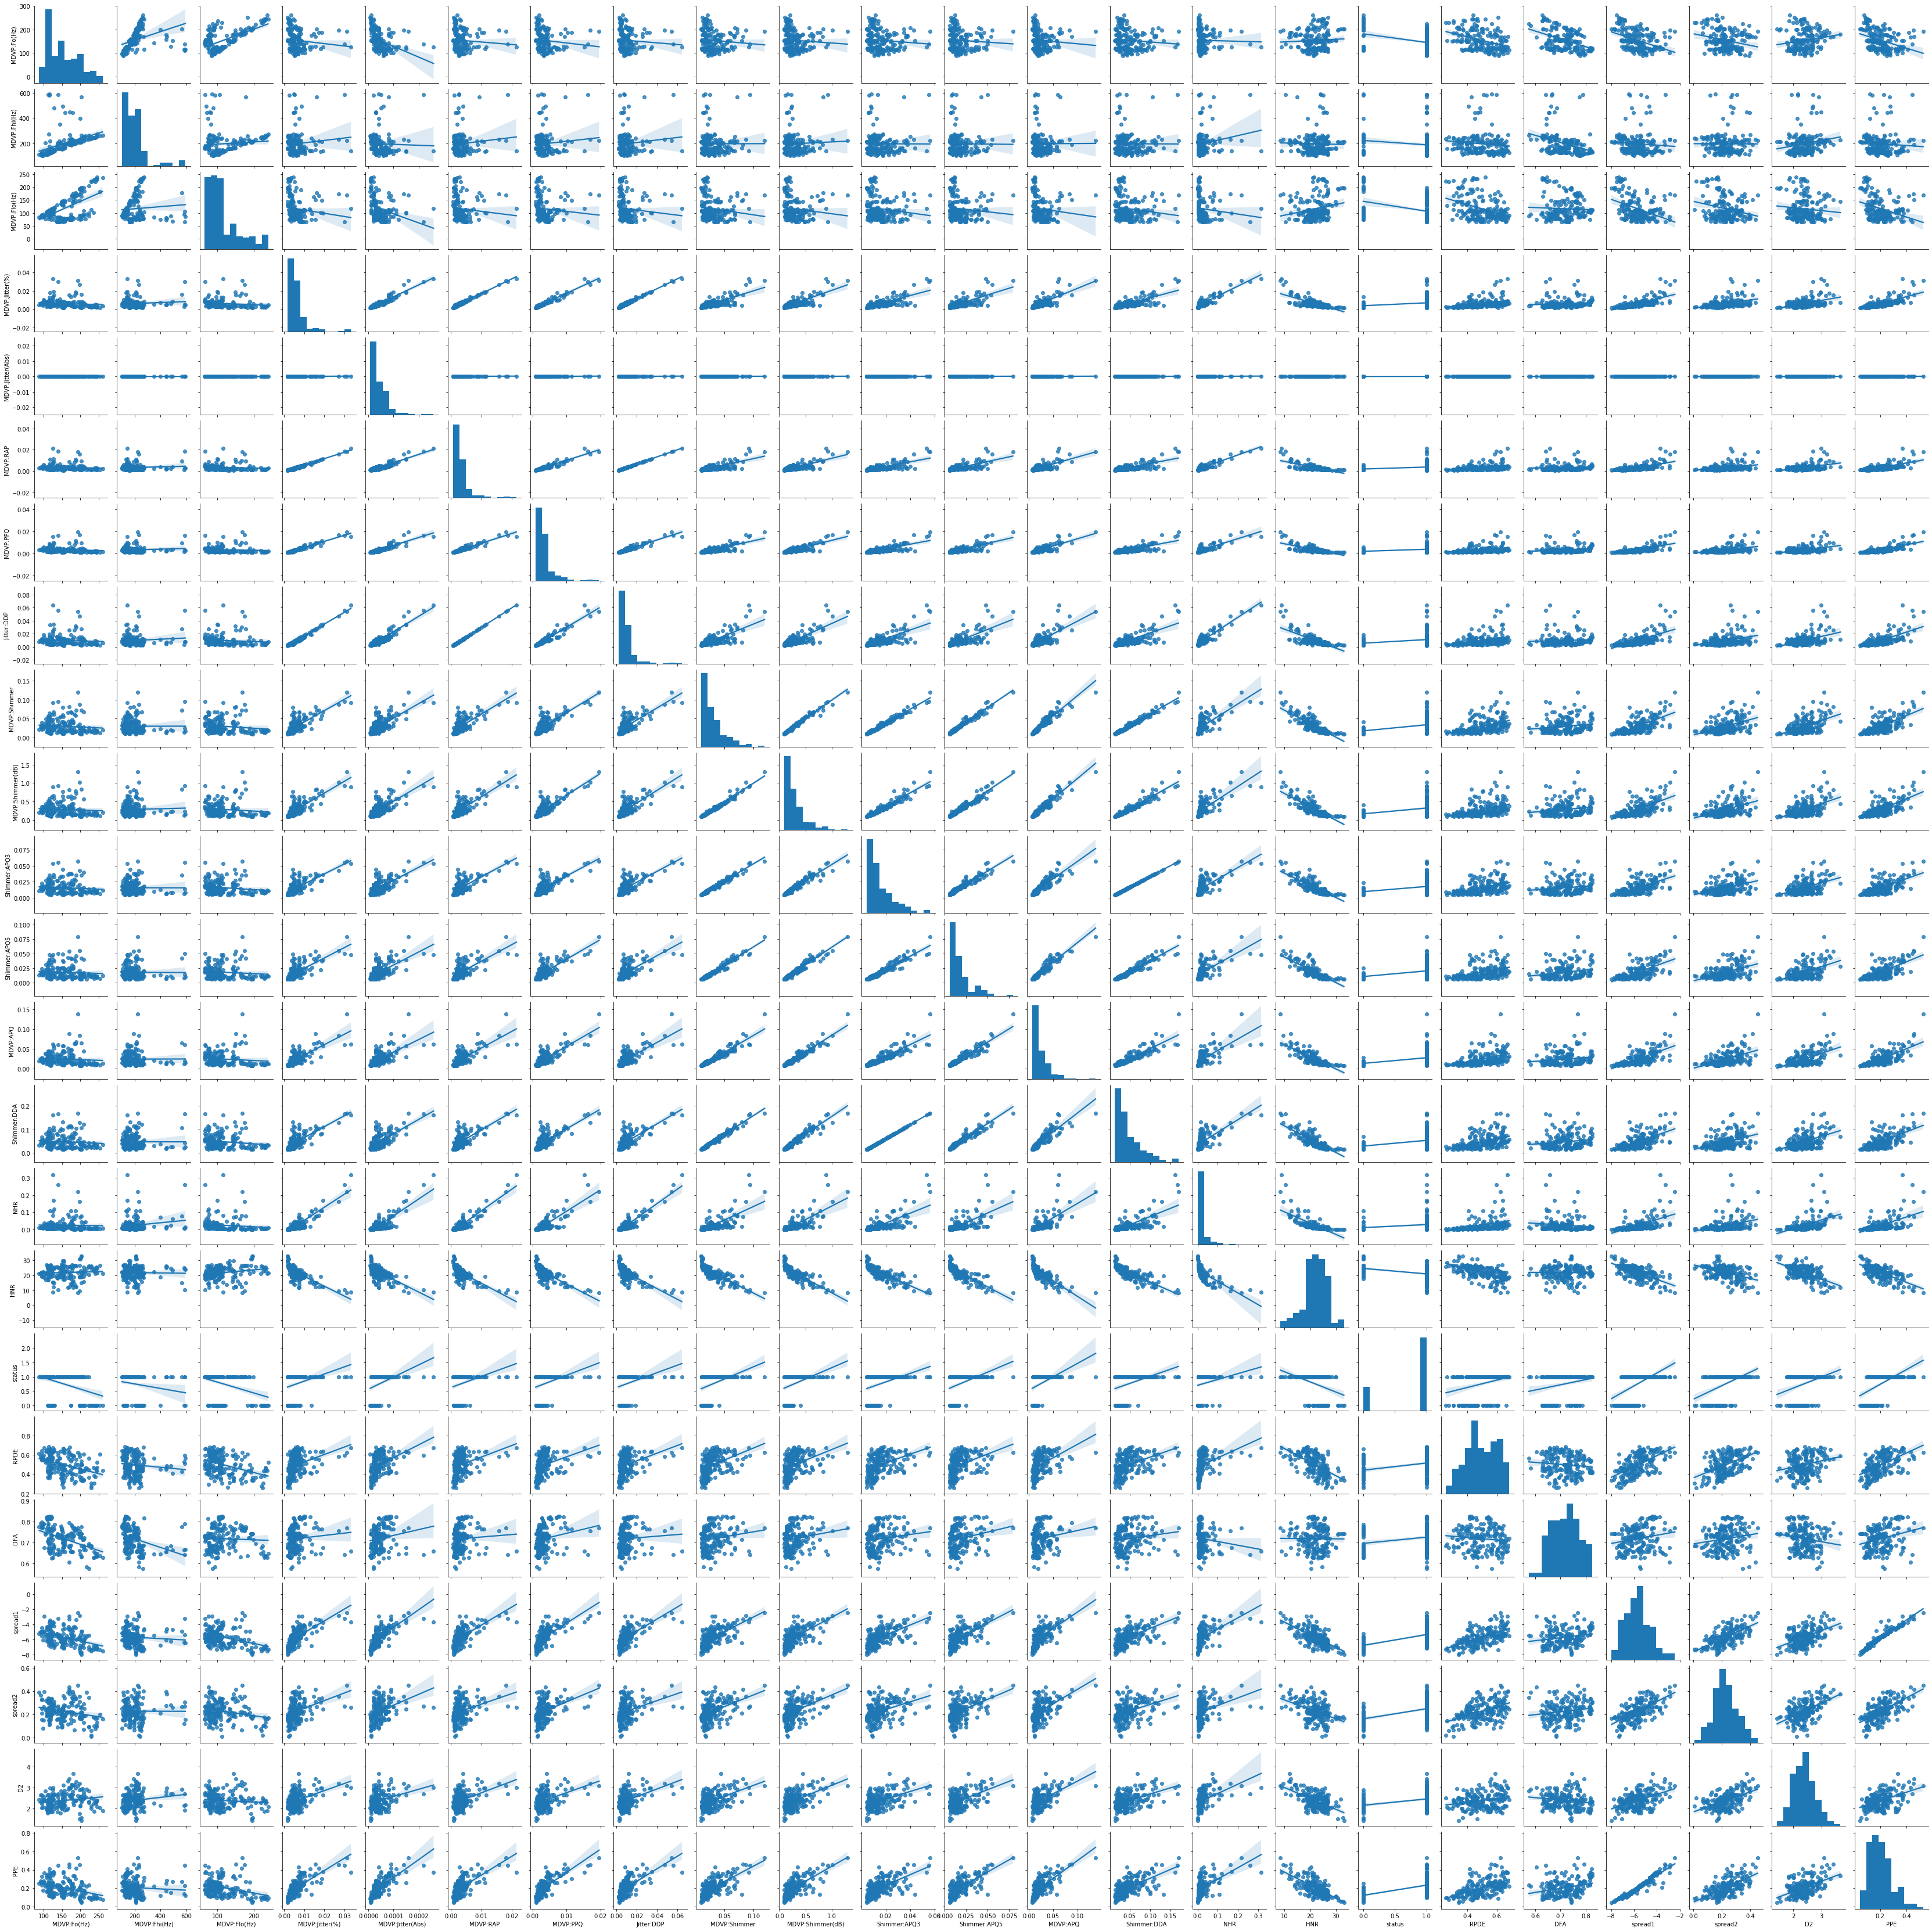

In [278]:
sns.pairplot(df,height=2,aspect=1,kind='reg')

We can observe the bivariate relationship between all the variable. We can notice that the dataset is not linearly separable.

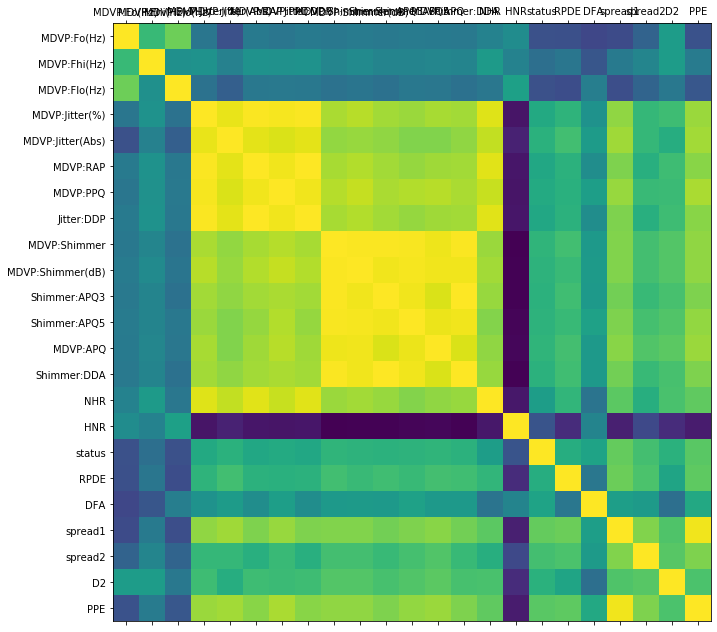

In [279]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(df)

By looking at the 

# Answer 4. Splitting the dataset into training and testing set
We will also remove 'name' column because it is nominal

In [281]:
df=df.drop(['name'],axis=1)

KeyError: "['name'] not found in axis"

In [ ]:
X=df.drop(['status'],axis=1)
y=df['status']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
x_train.head()

## Answer 5. We Scale the dataset
Since there are no missing values, we do not need to perform any operations to handle them

In [ ]:
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

## Answer 6. We perform standard classification algorithms like Logistic Regression, Naive Bayes Classifier, KNN, SVM Classifier. We also fit these models on the scaled data
### Logistic Regression

In [ ]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model1 = LogisticRegression(solver="liblinear")
model1.fit(x_train, y_train)
#predict on test
predict1 = model1.predict(x_test)

coef_df1 = pd.DataFrame(model1.coef_)
coef_df1['intercept'] = model1.intercept_
print(coef_df1)

In [282]:
model1_score = model1.score(x_test, y_test)
print(model1_score)
print(metrics.confusion_matrix(y_test,predict1))

0.8135593220338984
[[10  9]
 [ 2 38]]


In [283]:
model1s=LogisticRegression(solver='liblinear')
model1s.fit(x_train_scaled,y_train)
predict1s=model1.predict(x_test_scaled)

In [284]:
model1s_score=model1s.score(x_test_scaled,y_test)
print(model1_score)

0.8135593220338984


,Predict 1,Predict 0
Actual 1,27,13
Actual 0,4,15


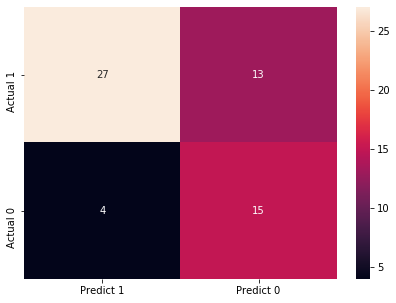

In [285]:
cm1=metrics.confusion_matrix(y_test, predict1s, labels=[1, 0])

df_cm1 = pd.DataFrame(cm1, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True)
df_cm1

In [286]:
print("Confusion Matrix of Logistic Regression")
print(df_cm1)
print('')
print('')
print("Classification report of Logistic Regression:")
print(metrics.classification_report(y_test,predict1))

Confusion Matrix of Logistic Regression
          Predict 1  Predict 0
Actual 1         27         13
Actual 0          4         15


Classification report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.53      0.65        19
           1       0.81      0.95      0.87        40

    accuracy                           0.81        59
   macro avg       0.82      0.74      0.76        59
weighted avg       0.82      0.81      0.80        59



## Naive Bayes

In [287]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
model2 = GaussianNB()

model2.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [288]:
predict2 = model2.predict(x_test)
model2_score=model2.score(x_test,y_test)
print(model2_score)

0.711864406779661


In [289]:
model2s=GaussianNB()
model2s.fit(x_train_scaled,y_train)
predict2s=model2s.predict(x_test_scaled)


In [290]:
model2s_score=model2s.score(x_test_scaled,y_test)
print(model2s_score)

0.6610169491525424


,Predict 1,Predict 0
Actual 1,24,16
Actual 0,1,18


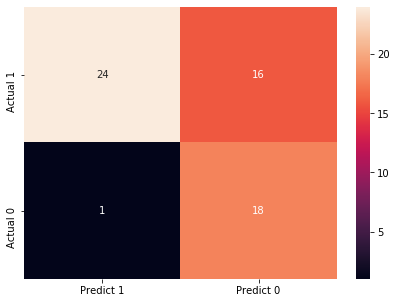

In [291]:
cm2=metrics.confusion_matrix(y_test, predict2, labels=[1, 0])

df_cm2= pd.DataFrame(cm2, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True)
df_cm2

In [292]:
print("Confusion Matrix of Naive Bayes")
print(df_cm2)
print('')
print('')
print("Classification report of Naive Bayes:")
print(metrics.classification_report(y_test,predict2))

Confusion Matrix of Naive Bayes
          Predict 1  Predict 0
Actual 1         24         16
Actual 0          1         18


Classification report of Naive Bayes:
              precision    recall  f1-score   support

           0       0.53      0.95      0.68        19
           1       0.96      0.60      0.74        40

    accuracy                           0.71        59
   macro avg       0.74      0.77      0.71        59
weighted avg       0.82      0.71      0.72        59



## KNN

In [293]:
from sklearn.neighbors import KNeighborsClassifier
scoresknn=[]
for k in range(1,10):
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH.fit(x_train,y_train)
    scoresknn.append(NNH.score(x_test,y_test))

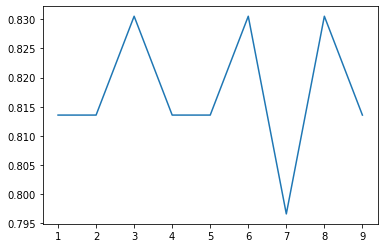

In [294]:
plt.plot(range(1,10),scoresknn)

In [295]:
model3 = KNeighborsClassifier(n_neighbors= 3, weights = 'distance' )
# Call Nearest Neighbour algorithm
#We chose 3 since it's apparent from the curve that we get a good score at 55 and it's closer to sqrt(n).
model3.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [296]:
predict3 = model3.predict(x_test)
model3.score(x_test, y_test)

0.8305084745762712

In [297]:
model3s=KNeighborsClassifier(n_neighbors=3,weights='distance')
model3s.fit(x_train_scaled,y_train)
predict3s=model3s.predict(x_test_scaled)

In [298]:
model3s_score=model3s.score(x_test_scaled,y_test)
print(model3s_score)

0.8813559322033898


,Predict 1,Predict 0
Actual 1,39,1
Actual 0,6,13


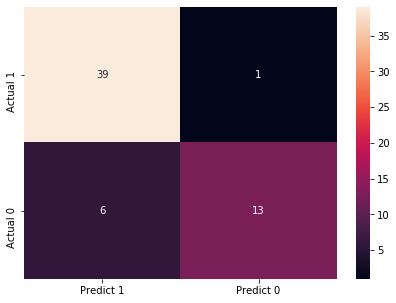

In [299]:
cm3s=metrics.confusion_matrix(y_test, predict3s, labels=[1, 0])

df_cm3s= pd.DataFrame(cm3s, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3s, annot=True)
df_cm3s

In [300]:
print("Confusion Matrix of KNN")
print(df_cm3s)
print('')
print('')
print("Classification report of KNN:")
print(metrics.classification_report(y_test,predict3s))

Confusion Matrix of KNN
          Predict 1  Predict 0
Actual 1         39          1
Actual 0          6         13


Classification report of KNN:
              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.87      0.97      0.92        40

    accuracy                           0.88        59
   macro avg       0.90      0.83      0.85        59
weighted avg       0.89      0.88      0.88        59



## SVM

In [301]:
from sklearn import svm

In [302]:
model4=svm.SVC(gamma=0.001,C=1000)
model4.fit(x_train,y_train)
predict4=model4.predict(x_test)
model4_score=model4.score(x_test,y_test)
print(model4_score)

0.8135593220338984


In [303]:
model4s=svm.SVC(gamma=0.001,C=1000)
model4s.fit(x_train_scaled,y_train)
predict4s=model4s.predict(x_test_scaled)
model4s_score=model4s.score(x_test_scaled,y_test)
print(model4s_score)

0.847457627118644


,Predict 1,Predict 0
Actual 1,39,1
Actual 0,8,11


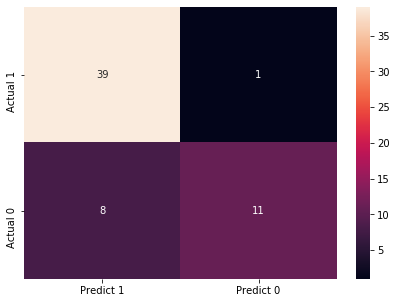

In [304]:
cm4s=metrics.confusion_matrix(y_test, predict4s, labels=[1, 0])

df_cm4s= pd.DataFrame(cm4s, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm4s, annot=True)
df_cm4s

In [305]:
print("Confusion Matrix of SVM")
print(df_cm4s)
print('')
print('')
print("Classification report of SVM:")
print(metrics.classification_report(y_test,predict4s))

Confusion Matrix of SVM
          Predict 1  Predict 0
Actual 1         39          1
Actual 0          8         11


Classification report of SVM:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59



## Decision Tree Classifier

In [306]:
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model5.fit(x_train, y_train)
predict5=model5.predict(x_test)

In [307]:
model5.score(x_test,y_test)

0.847457627118644

In [308]:
model5R = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
model5R.fit(x_train, y_train)
print(model5R.score(x_train, y_train))
print(model5R.score(x_test, y_test))

0.9705882352941176
0.7796610169491526


,Predict 1,Predict 0
Actual 1,37,3
Actual 0,6,13


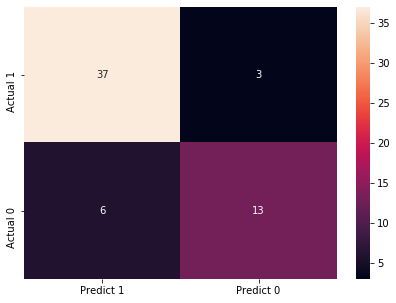

In [309]:
cm5=metrics.confusion_matrix(y_test, predict5, labels=[1, 0])

df_cm5= pd.DataFrame(cm5, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm5, annot=True)
df_cm5

In [310]:
print("Confusion Matrix of Logistic Regression")
print(df_cm5)
print('')
print('')
print("Classification report of Logistic Regression:")
print(metrics.classification_report(y_test,predict5))

Confusion Matrix of Logistic Regression
          Predict 1  Predict 0
Actual 1         37          3
Actual 0          6         13


Classification report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.86      0.93      0.89        40

    accuracy                           0.85        59
   macro avg       0.84      0.80      0.82        59
weighted avg       0.85      0.85      0.84        59



In [312]:
print (pd.DataFrame(model5.feature_importances_, columns = ["Imp"], index = x_train.columns))

                       Imp
MDVP:Fo(Hz)       0.124115
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ3      0.104042
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.044186
NHR               0.000000
HNR               0.118238
RPDE              0.000000
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.153085
PPE               0.456333


## Answer7. Meta-Classifier
I have applied Random Forest algorithm as a meta-classifier algorithm

In [313]:
from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
model6 = model6.fit(x_train, y_train)

In [314]:
predict6 = model6.predict(x_test)
print(model6.score(x_test, y_test))

0.847457627118644


In [315]:
model6s = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
model6s = model6.fit(x_train_scaled, y_train)

In [316]:
predict6s=model6s.predict(x_test_scaled)
print(model6s.score(x_test_scaled,y_test))

0.8305084745762712


,Predict 1,Predict 0
Actual 1,39,1
Actual 0,8,11


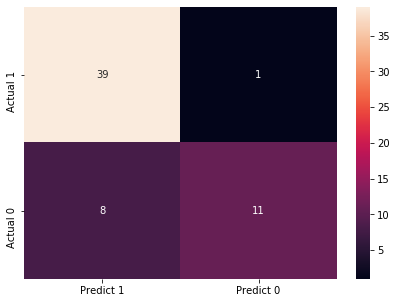

In [317]:
cm6=metrics.confusion_matrix(y_test, predict6, labels=[1, 0])

df_cm6= pd.DataFrame(cm6, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm6, annot=True)
df_cm6

In [318]:
print("Confusion Matrix of Random Forest")
print(df_cm6)
print('')
print('')
print("Classification report of Random Forest:")
print(metrics.classification_report(y_test,predict6))

Confusion Matrix of Random Forest
          Predict 1  Predict 0
Actual 1         39          1
Actual 0          8         11


Classification report of Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59



# Answer 8.Ensemble Learning models

## Gradient Boosting Classifier

In [319]:
from sklearn.ensemble import GradientBoostingClassifier
model7 = GradientBoostingClassifier(n_estimators = 50,random_state=1)
model7 = model7.fit(x_train, y_train)

In [320]:
predict7 = model7.predict(x_test)
print(model7.score(x_test, y_test))

0.8813559322033898


,Predict 1,Predict 0
Actual 1,38,2
Actual 0,5,14


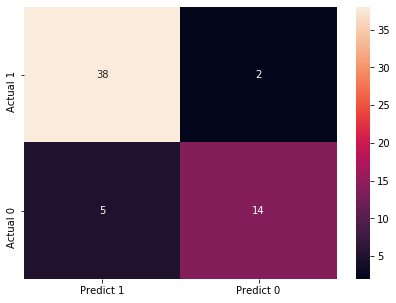

In [321]:
cm7=metrics.confusion_matrix(y_test, predict7, labels=[1, 0])

df_cm7= pd.DataFrame(cm7, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm7, annot=True)
df_cm7

In [334]:
print("Confusion Matrix of Gradient Boosting")
print(df_cm7)
print('')
print('')
print("Classification report of Gradient Boosting:")
print(metrics.classification_report(y_test,predict7))

Confusion Matrix of Gradient Boosting
          Predict 1  Predict 0
Actual 1         38          2
Actual 0          5         14


Classification report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.88      0.95      0.92        40

    accuracy                           0.88        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.88      0.88      0.88        59



## AdaBoost Classifier

In [323]:
from sklearn.ensemble import AdaBoostClassifier
model8 = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
model8 = model8.fit(x_train, y_train)

In [324]:
predict8 = model8.predict(x_test)
print(model8.score(x_test , y_test))

0.8305084745762712


,Predict 1,Predict 0
Actual 1,36,4
Actual 0,6,13


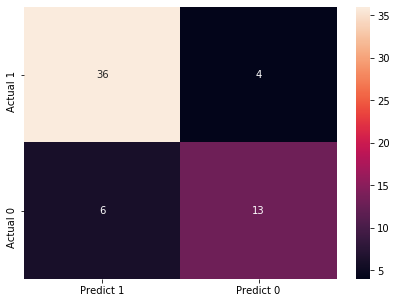

In [325]:
cm8=metrics.confusion_matrix(y_test, predict8, labels=[1, 0])

df_cm8= pd.DataFrame(cm8, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm8, annot=True)
df_cm8

In [333]:
print("Confusion Matrix of Adaboost")
print(df_cm8)
print('')
print('')
print("Classification report of Adaboost:")
print(metrics.classification_report(y_test,predict8))

Confusion Matrix of Adaboost
          Predict 1  Predict 0
Actual 1         36          4
Actual 0          6         13


Classification report of Adaboost:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        19
           1       0.86      0.90      0.88        40

    accuracy                           0.83        59
   macro avg       0.81      0.79      0.80        59
weighted avg       0.83      0.83      0.83        59



## Bagging Classifier

In [327]:
from sklearn.ensemble import BaggingClassifier

model10 = BaggingClassifier(base_estimator=model5R, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

model10 = model10.fit(x_train, y_train)

In [328]:
predict10 = model10.predict(x_test)

print(model10.score(x_test , y_test))

0.847457627118644


,Predict 1,Predict 0
Actual 1,39,1
Actual 0,8,11


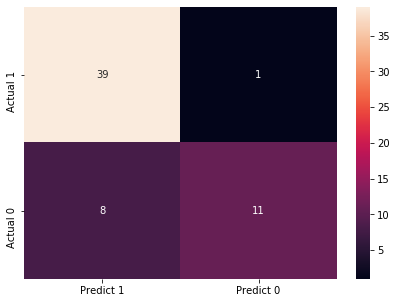

In [329]:
cm10=metrics.confusion_matrix(y_test, predict10, labels=[1, 0])

df_cm10= pd.DataFrame(cm10, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm10, annot=True)
df_cm10

In [335]:
print("Confusion Matrix of Bagging Classifier")
print(df_cm10)
print('')
print('')
print("Classification report of Bagging Classifier:")
print(metrics.classification_report(y_test,predict10))

Confusion Matrix of Bagging Classifier
          Predict 1  Predict 0
Actual 1         39          1
Actual 0          8         11


Classification report of Bagging Classifier:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71        19
           1       0.83      0.97      0.90        40

    accuracy                           0.85        59
   macro avg       0.87      0.78      0.80        59
weighted avg       0.86      0.85      0.84        59



# Answer 9. Comparison of All the methods

In [336]:
data = [['Logistic Regression', 0.81],['Naive Bayes',0.71],['KNN',0.88],['SVM',0.85],['Decision Tree',0.85],['Random Forest',0.85],['Gradient Boost',0.88],['AdaBoost',0.85],['Bagging Classifier',0.85]] 
  
# Create the pandas DataFrame 
df1 = pd.DataFrame(data, columns = ['Model', 'Accuracy'])

In [338]:
df1

,Model,Accuracy
0,Logistic Regression,0.81
1,Naive Bayes,0.71
2,KNN,0.88
3,SVM,0.85
4,Decision Tree,0.85
5,Random Forest,0.85
6,Gradient Boost,0.88
7,AdaBoost,0.85
8,Bagging Classifier,0.85


KNN and Gradient Boost both have similar accuracy and f1-score, Gradient Boost is slightly better than KNN.
We conclude that the best algorithm for this problem is Gradient Boost.